### PROJECT: WRANGLE AND ANALYZE DATA

##### INTRODUCTION: 
The project involves gathering, wrangling, and analyzing the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because they are good dogs. WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for students to use in this project. This archive contains basic tweet data (tweet_id, timestamp, text, etc) for all 5000+ of their tweets as they stood on August 1, 2017

In [1]:
# Import neccessary libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tweepy
import requests
import time
import json
from wordcloud import WordCloud

plt.rcParams.update({'font.family': 'cursive'})

### GATHERING DATA

In [2]:
# read in the twitter_archive downloaded from udacity

twitter_archive = pd.read_csv(r'C:\Users\SAMUEL\Documents\Udacity Data\data wrangling\twitter-archive-enhanced.csv')

In [39]:
# download 'image_predictions.tsv' programmatically from Udacity servers using the request library
# and writing the data to a csv file (img_pred.csv)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
header = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.61 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
req = requests.get(url, headers=header)
file = open('img_pred.csv', 'wb').write(req.content)

In [3]:
# read in img_pred.csv into a dataframe 

df_image_pred = pd.read_csv(r'img_pred.csv', delimiter = '\t')

In [12]:
# create an API object to use to gather Twitter data

consumer_key = api_key
consumer_secret = api_secret
access_token = acc_tok
access_secret = acc_sec

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)

_Using tweepy to query Twitter's API for additional data beyond the data included in the WeRateDogs Twitter archive. This additional data will include retweet_count, and favorite_count. The JSON data gathered after querying each tweet ID will be written to the required 'tweet_json.txt' file with each tweet's JSON on its own line, then read, line by line, to create a pandas DataFrame to assess and clean._

In [16]:
# To finsih this query, 20-30 minutes of running time can be expected

df_list = []
error_ids = []
index = -1
start = time.time()

with open('tweet_json.txt', 'w') as txt_file:
    for tweet_ids in twitter_archive.tweet_id:
        index += 1
        try:
            tweet = api.get_status(tweet_ids, tweet_mode = 'extended')
            json.dump(tweet._json, txt_file)
            txt_file.write('\n')            
            print(tweet_ids, 'success')
        except tweepy.errors.TweepyException:
            print(tweet_ids, 'error')
            error_ids.append(tweet_ids)
            pass

end = time.time()
print('Time taken to finish query:', end-start, 'seconds')

892420643555336193 success
892177421306343426 success
891815181378084864 success
891689557279858688 success
891327558926688256 success
891087950875897856 success
890971913173991426 success
890729181411237888 success
890609185150312448 success
890240255349198849 success
890006608113172480 success
889880896479866881 success
889665388333682689 success
889638837579907072 success
889531135344209921 success
889278841981685760 success
888917238123831296 success
888804989199671297 success
888554962724278272 success
888202515573088257 error
888078434458587136 success
887705289381826560 success
887517139158093824 success
887473957103951883 success
887343217045368832 success
887101392804085760 success
886983233522544640 success
886736880519319552 success
886680336477933568 success
886366144734445568 success
886267009285017600 success
886258384151887873 success
886054160059072513 success
885984800019947520 success
885528943205470208 success
885518971528720385 success
885311592912609280 success
885

836260088725786625 success
836001077879255040 success
835685285446955009 success
835574547218894849 success
835536468978302976 success
835309094223372289 success
835297930240217089 success
835264098648616962 success
835246439529840640 success
835172783151792128 success
835152434251116546 success
834931633769889797 success
834786237630337024 success
834574053763584002 success
834477809192075265 success
834458053273591808 success
834209720923721728 success
834167344700198914 success
834089966724603904 success
834086379323871233 success
833863086058651648 success
833826103416520705 success
833732339549220864 success
833722901757046785 success
833479644947025920 success
833124694597443584 success
832998151111966721 success
832769181346996225 success
832757312314028032 success
832682457690300417 success
832645525019123713 success
832636094638288896 success
832397543355072512 success
832369877331693569 success
832273440279240704 success
832215909146226688 success
832215726631055365 success
8

797545162159308800 success
797236660651966464 success
797165961484890113 success
796904159865868288 success
796865951799083009 success
796759840936919040 success
796563435802726400 success
796484825502875648 success
796387464403357696 success
796177847564038144 success
796149749086875649 success
796125600683540480 success
796116448414461957 success
796080075804475393 success
796031486298386433 success
795464331001561088 success
795400264262053889 success
795076730285391872 success
794983741416415232 success
794926597468000259 success
794355576146903043 success
794332329137291264 success
794205286408003585 success
793962221541933056 success
793845145112371200 success
793614319594401792 success
793601777308463104 success
793500921481273345 success
793286476301799424 success
793271401113350145 success
793256262322548741 success
793241302385262592 success
793226087023144960 success
793210959003287553 success
793195938047070209 success
793180763617361921 success
793165685325201412 success
7

Rate limit reached. Sleeping for: 140


759446261539934208 success
759197388317847553 success
759159934323924993 success
759099523532779520 success
759047813560868866 success
758854675097526272 success
758828659922702336 success
758740312047005698 success
758474966123810816 success
758467244762497024 success
758405701903519748 success
758355060040593408 success
758099635764359168 success
758041019896193024 success
757741869644341248 success
757729163776290825 success
757725642876129280 success
757611664640446465 success
757597904299253760 success
757596066325864448 success
757400162377592832 success
757393109802180609 success
757354760399941633 success
756998049151549440 success
756939218950160384 success
756651752796094464 success
756526248105566208 success
756303284449767430 success
756288534030475264 success
756275833623502848 success
755955933503782912 success
755206590534418437 success
755110668769038337 success
754874841593970688 success
754856583969079297 success
754747087846248448 success
754482103782404096 success
7

717009362452090881 success
716802964044845056 success
716791146589110272 success
716730379797970944 success
716447146686459905 success
716439118184652801 success
716285507865542656 success
716080869887381504 success
715928423106027520 success
715758151270801409 success
715733265223708672 success
715704790270025728 success
715696743237730304 success
715680795826982913 success
715360349751484417 success
715342466308784130 success
715220193576927233 success
715200624753819648 success
715009755312439296 success
714982300363173890 success
714962719905021952 success
714957620017307648 success
714631576617938945 success
714606013974974464 success
714485234495041536 success
714258258790387713 success
714251586676113411 success
714214115368108032 success
714141408463036416 success
713919462244790272 success
713909862279876608 success
713900603437621249 success
713761197720473600 success
713411074226274305 success
713177543487135744 success
713175907180089344 success
712809025985978368 success
7

692142790915014657 success
692041934689402880 success
692017291282812928 success
691820333922455552 success
691793053716221953 success
691756958957883396 success
691675652215414786 success
691483041324204033 success
691459709405118465 success
691444869282295808 success
691416866452082688 success
691321916024623104 success
691096613310316544 success
691090071332753408 success
690989312272396288 success
690959652130045952 success
690938899477221376 success
690932576555528194 success
690735892932222976 success
690728923253055490 success
690690673629138944 success
690649993829576704 success
690607260360429569 success
690597161306841088 success
690400367696297985 success
690374419777196032 success
690360449368465409 success
690348396616552449 success
690248561355657216 success
690021994562220032 success
690015576308211712 success
690005060500217858 success
689999384604450816 success
689993469801164801 success
689977555533848577 success
689905486972461056 success
689877686181715968 success
6

Rate limit reached. Sleeping for: 152


677331501395156992 success
677328882937298944 success
677314812125323265 success
677301033169788928 success
677269281705472000 success
677228873407442944 success
677187300187611136 success
676975532580409345 success
676957860086095872 success
676949632774234114 success
676948236477857792 success
676946864479084545 success
676942428000112642 success
676936541936185344 success
676916996760600576 success
676897532954456065 success
676864501615042560 success
676821958043033607 success
676819651066732545 success
676811746707918848 success
676776431406465024 success
676617503762681856 success
676613908052996102 success
676606785097199616 success
676603393314578432 success
676593408224403456 success
676590572941893632 success
676588346097852417 success
676582956622721024 success
676575501977128964 success
676533798876651520 success
676496375194980353 success
676470639084101634 success
676440007570247681 success
676430933382295552 success
676263575653122048 success
676237365392908289 success
6

670733412878163972 success
670727704916926465 success
670717338665226240 success
670704688707301377 success
670691627984359425 success
670679630144274432 success
670676092097810432 success
670668383499735048 success
670474236058800128 success
670468609693655041 success
670465786746662913 success
670452855871037440 success
670449342516494336 success
670444955656130560 success
670442337873600512 success
670435821946826752 success
670434127938719744 success
670433248821026816 success
670428280563085312 success
670427002554466305 success
670421925039075328 success
670420569653809152 success
670417414769758208 success
670411370698022913 success
670408998013820928 success
670403879788544000 success
670385711116361728 success
670374371102445568 success
670361874861563904 success
670338931251150849 success
670319130621435904 success
670303360680108032 success
670290420111441920 success
670093938074779648 success
670086499208155136 success
670079681849372674 success
670073503555706880 success
6

In [4]:
# store tweet_data from tweet_json.txt file into a list and then convert into a dataframe

df_list = []
with open('tweet_json.txt') as f:
    for tweet_data in f:
        df_list.append(json.loads(tweet_data))
        
df_json = pd.DataFrame(df_list, columns = ['id', 'favorite_count', 'retweet_count', 'is_quote_status'])

### ASSESSING DATA

##### VISUAL ASSESSMENT

In [5]:
# visually assessing the twitter_archive data from WeRateDogs

twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


tweet_id: A unique ID of the author's original tweet                                                                           
in_reply_to_status_id: The ID of a tweet that led to the author's response                                                     
in_reply_to_user_id: The ID of the author of the tweet that led to the author's response                                       
timestamp: Timestamp based on the author's location                                                                            
source: The source of the tweet (IPhone, Android, web, etc)                                                                     
text: The body of the tweet                                                                                                     
retweeted_status_id: The ID of a retweeted tweet                                                                               
retweeted_status_user_id: The ID of the author of the retweeted tweet                                                           
retweeted_status_timestamp: Timestamp for the retweeted tweet                                                                   
expanded_urls: The expanded url of each tweet                                                                                   
rating_numerator: The numerator of dog ratings                                                                                 
rating_denominator: The denominator of dog ratings                                                                             
name: The name of the dog                                                                                                      
doggo: Indicates if a dog is a big pupper                                                                                      
floofer: Indicates if a dog is furry                                                                                           
pupper: Indicates a small doggo, usually younger                                                                               
puppo: Indicates if a dog is in its teen phase                                                                                 

In [6]:
# visually assessing the image_predictions data

df_image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


tweet_id: A unique ID of the author's original tweet                                                                           
jpg_url: The url of the image in the tweet                                                                                     
img_num: ranges from 1 to 4, specifying the number of images in a tweet                                                         
p1 is the algorithm's #1 predicrion for the image in the tweet                                                                 
p1_conf is how confident the algprithm is in its #1 prediction                                                                 
p1_dog is whether or not the #1 prediction is a breed of dog                                                                   
p2 is the algorithm's second most likely prediction                                                                            
p2_conf is how confident the algorithm is in its #2 prediction                                                                 
p2_dog is whether or not the #2 prediction is a breed of dog                                                                   
p3 is the algorithm's third most likely prediction                                                                             
p3_conf is how confident the algorithm is in its #3 prediction                                                                 
p3_dog is whether or not the #3 prediction is a breed of dog                                                                   

In [7]:
# visually assessing the tweet_json gathered from querying Twitter's API

df_json

,id,favorite_count,retweet_count,is_quote_status
0,892420643555336193,33711,6975,False
1,892177421306343426,29234,5276,False
2,891815181378084864,21982,3466,False
3,891689557279858688,36808,7197,False
4,891327558926688256,35191,7721,False
...,...,...,...,...
2320,666049248165822465,88,36,False
2321,666044226329800704,246,115,False
2322,666033412701032449,100,36,False
2323,666029285002620928,112,39,False


##### PROGRAMMATIC ASSESSMENT

In [8]:
# programmatically assessing the twitter_archive data

twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
# getting the summary statistics of the twitter_archive data

twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
# programmatically assessing the image_predictions data

df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
# getting the summary statistics of the image_predictions data

df_image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [12]:
# programmatically assessing the tweet_json data

df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               2325 non-null   int64
 1   favorite_count   2325 non-null   int64
 2   retweet_count    2325 non-null   int64
 3   is_quote_status  2325 non-null   bool 
dtypes: bool(1), int64(3)
memory usage: 56.9 KB


In [13]:
# getting the summary statistics of the tweet_json data

df_json.describe()

,id,favorite_count,retweet_count
count,2.325000e+03,2325.000000,2325.000000
mean,7.418435e+17,7034.110538,2461.587527
std,6.821552e+16,10928.014952,4167.500549
min,6.660209e+17,0.000000,1.000000
25%,6.780233e+17,1217.000000,492.000000
50%,7.182346e+17,3043.000000,1147.000000
75%,7.986654e+17,8581.000000,2849.000000
max,8.924206e+17,144322.000000,70371.000000


#### DATA QUALITY AND TIDINESS ISSUES

##### QUALITY ISSUES:
1. Retweeted_status_id in twitter_archive shows that there are 181 retweets in the dataset, as we need original tweets only.   
2. In the twitter_archive dataset, some columns (name, doggo, floofer, pupper, and puppo) contain "None" where the value should be empty (Nan, or null).                                                                                                       
3. In the twitter_archive dataset, there are Values other than 10 in the rating_denominator column                             
4. In the twitter_archive dataset, Timestamp data type is recorded as object instead of datetime                               
5. The column name for tweet ID is not the same for the 3 dataset gathered, as it is named 'id' in the tweet_json data, and 'tweet_id' in the other 2 dataset.                                                                                             
6. Less important columns like in_reply_to_status_id, in_reply_to_user_id, etc are in the twitter_archive dataset               
7. In the twitter_archive dataset, unnecessary charcters in the source column should be trimmed.
8. In the twitter_archive dataset, there are missing values in the expanded_urls column                                         
9. In the twitter_archive dataset, some values in the expanded_urls column are separated by comma ','

##### TIDINESS ISSUES:                  
10. In the twitter_archive dataset, Timestamp column has year, month, and date together in a single cell.                       
11. In the image_prediction dataset, some observations are from tweets not related to dogs.                                     
12. In the twitter_archive dataset, columns 'doggo', 'floofer', 'pupper', and 'puppo' are not a variable.

### CLEANING DATA

In [14]:
copy_twitter_archive = twitter_archive.copy()
copy_image_pred = df_image_pred.copy()
copy_df_json = df_json.copy()

##### ISSUE 1- DEFINE

Deleting Retweets in twitter archive, df_json, and df_image_pred datasets

In [15]:
# CHECKING for retweets in the twitter archive dataset

retweets_id = list(twitter_archive.query('not retweeted_status_id.isnull()', engine = 'python').tweet_id)
print('No of retweets:', len(retweets_id))
print('Shape before:', twitter_archive.shape)
retweets_id

No of retweets: 181
Shape before: (2356, 17)


[888202515573088257,
 886054160059072513,
 885311592912609280,
 879130579576475649,
 878404777348136964,
 878316110768087041,
 877611172832227328,
 874434818259525634,
 873697596434513921,
 873337748698140672,
 872668790621863937,
 871166179821445120,
 869988702071779329,
 868639477480148993,
 867072653475098625,
 866816280283807744,
 866094527597207552,
 863471782782697472,
 861769973181624320,
 860981674716409858,
 860924035999428608,
 860177593139703809,
 858860390427611136,
 857062103051644929,
 856602993587888130,
 856330835276025856,
 855245323840757760,
 855138241867124737,
 852936405516943360,
 851953902622658560,
 851861385021730816,
 849668094696017920,
 847978865427394560,
 847971574464610304,
 845459076796616705,
 845098359547420673,
 842892208864923648,
 841833993020538882,
 840761248237133825,
 840728873075638272,
 839290600511926273,
 838916489579200512,
 838831947270979586,
 838201503651401729,
 837012587749474308,
 836648853927522308,
 836397794269200385,
 835685285446

In [16]:
# CHECKING for retweets in df_json

RT = []

for x in df_json.id:
    if x in retweets_id:
        RT.append(x)
    else:
        pass

print('No of retweets:', len(RT))
print('Shape before:', df_json.shape)
RT

No of retweets: 160
Shape before: (2325, 4)


[886054160059072513,
 885311592912609280,
 879130579576475649,
 878404777348136964,
 878316110768087041,
 877611172832227328,
 874434818259525634,
 873337748698140672,
 871166179821445120,
 868639477480148993,
 867072653475098625,
 866094527597207552,
 863471782782697472,
 860981674716409858,
 860924035999428608,
 860177593139703809,
 858860390427611136,
 857062103051644929,
 855245323840757760,
 855138241867124737,
 852936405516943360,
 849668094696017920,
 847978865427394560,
 847971574464610304,
 845098359547420673,
 841833993020538882,
 840761248237133825,
 840728873075638272,
 839290600511926273,
 838916489579200512,
 838831947270979586,
 838201503651401729,
 836648853927522308,
 836397794269200385,
 835685285446955009,
 835536468978302976,
 835309094223372289,
 834477809192075265,
 833732339549220864,
 832769181346996225,
 832215909146226688,
 832215726631055365,
 832040443403784192,
 830173239259324417,
 829878982036299777,
 828801551087042563,
 826615380357632002,
 825120256414

In [17]:
# CHECKING for retweets in the image_prediction dataset

RT2 = []

for y in df_image_pred.tweet_id:
    if y in retweets_id:
        RT2.append(y)
    else:
        pass

print('No of retweets:', len(RT2))
print('Shape before:', df_image_pred.shape)
RT2

No of retweets: 81
Shape before: (2075, 12)


[667550882905632768,
 667550904950915073,
 711998809858043904,
 752309394570878976,
 754874841593970688,
 757597904299253760,
 757729163776290825,
 759159934323924993,
 759566828574212096,
 761371037149827077,
 761750502866649088,
 766078092750233600,
 770093767776997377,
 771004394259247104,
 771171053431250945,
 772615324260794368,
 775898661951791106,
 776819012571455488,
 777641927919427584,
 778396591732486144,
 780476555013349377,
 780496263422808064,
 782021823840026624,
 783347506784731136,
 786036967502913536,
 788070120937619456,
 790723298204217344,
 791026214425268224,
 793614319594401792,
 794355576146903043,
 794983741416415232,
 796177847564038144,
 798340744599797760,
 798628517273620480,
 798644042770751489,
 798665375516884993,
 798673117451325440,
 798694562394996736,
 798697898615730177,
 799774291445383169,
 800443802682937345,
 802247111496568832,
 802624713319034886,
 803692223237865472,
 804413760345620481,
 805958939288408065,
 806242860592926720,
 807059379405

##### CODE

In [18]:
# dropping the retweets in twitter_archive
_2list = twitter_archive.query('not retweeted_status_id.isnull()', engine = 'python').index
twitter_archive.drop(_2list, axis = 0, inplace = True)

# dropping the retweets in df_json
_2list2 = df_json.query('id in [886054160059072513,885311592912609280,879130579576475649,878404777348136964,878316110768087041,877611172832227328,874434818259525634,873337748698140672,871166179821445120,868639477480148993,867072653475098625,866094527597207552,863471782782697472,860981674716409858,860924035999428608,860177593139703809,858860390427611136,857062103051644929,855245323840757760,855138241867124737,852936405516943360,849668094696017920,847978865427394560,847971574464610304,845098359547420673,841833993020538882,840761248237133825,840728873075638272,839290600511926273,838916489579200512,838831947270979586,838201503651401729,836648853927522308,836397794269200385,835685285446955009,835536468978302976,835309094223372289,834477809192075265,833732339549220864,832769181346996225,832215909146226688,832215726631055365,832040443403784192,830173239259324417,829878982036299777,828801551087042563,826615380357632002,825120256414846976,824796380199809024,823719002937630720,823269594223824897,822647212903690241,822163064745328640,821813639212650496,821421320206483457,820837357901512704,820494788566847489,820446719150292993,820013781606658049,819015337530290176,819015331746349057,818646164899774465,818588835076603904,818307523543449600,817502432452313088,817181837579653120,816829038950027264,816062466425819140,816014286006976512,815745968457060357,814578408554463233,813944609378369540,809808892968534016,808134635716833280,807059379405148160,806620845233815552,806242860592926720,805958939288408065,805823200554876929,804413760345620481,803692223237865472,803321560782307329,802624713319034886,802185808107208704,801127390143516673,800855607700029440,800443802682937345,800188575492947969,799774291445383169,799308762079035393,798705661114773508,798701998996647937,798697898615730177,798694562394996736,798686750113755136,798682547630837760,798673117451325440,798665375516884993,798644042770751489,798628517273620480,798585098161549313,798576900688019456,798340744599797760,796904159865868288,796563435802726400,796177847564038144,794983741416415232,794355576146903043,793614319594401792,791821351946420224,791784077045166082,791780927877898241,791026214425268224,790723298204217344,790227638568808452,789960241177853952,789280767834746880,788552643979468800,788070120937619456,787111942498508800,786729988674449408,786036967502913536,783347506784731136,782021823840026624,780496263422808064,780476555013349377,780092040432480260,779124354206535695,778774459159379968,778396591732486144,777953400541634568,777641927919427584,776819012571455488,776249906839351296,775898661951791106,773336787167145985,772615324260794368,771171053431250945,770093767776997377,769335591808995329,768909767477751808,768554158521745409,766078092750233600,763167063695355904,761750502866649088,761371037149827077,760153949710192640,759159934323924993,757729163776290825,757597904299253760,754874841593970688,753298634498793472,752701944171524096,752309394570878976,747242308580548608,746521445350707200,743835915802583040,711998809858043904,667550904950915073,667550882905632768]').index
df_json.drop(_2list2, axis = 0, inplace = True)

# dropping the retweets in df_image_pred
_2list3 = df_image_pred.query('tweet_id in [667550882905632768,667550904950915073,711998809858043904,752309394570878976,754874841593970688,757597904299253760,757729163776290825,759159934323924993,759566828574212096,761371037149827077,761750502866649088,766078092750233600,770093767776997377,771004394259247104,771171053431250945,772615324260794368,775898661951791106,776819012571455488,777641927919427584,778396591732486144,780476555013349377,780496263422808064,782021823840026624,783347506784731136,786036967502913536,788070120937619456,790723298204217344,791026214425268224,793614319594401792,794355576146903043,794983741416415232,796177847564038144,798340744599797760,798628517273620480,798644042770751489,798665375516884993,798673117451325440,798694562394996736,798697898615730177,799774291445383169,800443802682937345,802247111496568832,802624713319034886,803692223237865472,804413760345620481,805958939288408065,806242860592926720,807059379405148160,808134635716833280,809808892968534016,813944609378369540,816014286006976512,816829038950027264,817181837579653120,818588835076603904,819015331746349057,819015337530290176,820446719150292993,821813639212650496,822647212903690241,823269594223824897,824796380199809024,829878982036299777,832040443403784192,832215726631055365,832769181346996225,837012587749474308,838916489579200512,839290600511926273,841833993020538882,842892208864923648,847971574464610304,851861385021730816,851953902622658560,860924035999428608,861769973181624320,867072653475098625,873697596434513921,877611172832227328,885311592912609280,888202515573088257]').index
df_image_pred.drop(_2list3, axis = 0, inplace = True)

##### TEST

In [19]:
# checks if all the values in retweeted_status_id column are false
print('No values in the retweeted_status_id column?', twitter_archive['retweeted_status_id'].isnull().all())
print('Shape of twitter_archive after:', twitter_archive.shape)
print('Shape of df_json after:', df_json.shape)
print('Shape of df_image_pred after:', df_image_pred.shape)

No values in the retweeted_status_id column? True
Shape of twitter_archive after: (2175, 17)
Shape of df_json after: (2165, 4)
Shape of df_image_pred after: (1994, 12)


##### ISSUE 2- DEFINE

Replace values containing 'None' in columns ('name', 'doggo', 'floofer', 'pupper', and 'puppo') with numpy NaN to indicate missing values.

In [20]:
# CHECK
twitter_archive[['name', 'doggo', 'floofer', 'pupper', 'puppo']]

,name,doggo,floofer,pupper,puppo
0,Phineas,None,None,None,None
1,Tilly,None,None,None,None
2,Archie,None,None,None,None
3,Darla,None,None,None,None
4,Franklin,None,None,None,None
...,...,...,...,...,...
2351,None,None,None,None,None
2352,a,None,None,None,None
2353,a,None,None,None,None
2354,a,None,None,None,None


##### CODE

In [21]:
twitter_archive['name'].replace('None', np.nan, inplace = True)
twitter_archive['doggo'].replace('None', np.nan, inplace = True)
twitter_archive['floofer'].replace('None', np.nan, inplace = True)
twitter_archive['pupper'].replace('None', np.nan, inplace = True)
twitter_archive['puppo'].replace('None', np.nan, inplace = True)

##### TEST

In [22]:
twitter_archive[['name', 'doggo', 'floofer', 'pupper', 'puppo']]

,name,doggo,floofer,pupper,puppo
0,Phineas,NaN,NaN,NaN,NaN
1,Tilly,NaN,NaN,NaN,NaN
2,Archie,NaN,NaN,NaN,NaN
3,Darla,NaN,NaN,NaN,NaN
4,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2351,NaN,NaN,NaN,NaN,NaN
2352,a,NaN,NaN,NaN,NaN
2353,a,NaN,NaN,NaN,NaN
2354,a,NaN,NaN,NaN,NaN


##### ISSUE 3- DEFINE

In [23]:
# Rating_denominator values other than 10
# QUICK CHECK
twitter_archive[['tweet_id', 'name', 'rating_denominator']].query('rating_denominator != 10')
# most of the ratings with denominator other than 10 have no name, it is better to drop them

,tweet_id,name,rating_denominator
313,835246439529840640,NaN,0
342,832088576586297345,NaN,15
433,820690176645140481,NaN,70
516,810984652412424192,Sam,7
902,758467244762497024,NaN,150
1068,740373189193256964,NaN,11
1120,731156023742988288,this,170
1165,722974582966214656,NaN,20
1202,716439118184652801,Bluebert,50
1228,713900603437621249,NaN,90


##### CODE

In [24]:
_list =  list(twitter_archive[['rating_denominator']].query('rating_denominator != 10').index)
twitter_archive.drop(_list, axis = 0, inplace = True)

##### TEST

In [25]:
twitter_archive['rating_denominator'].min() == twitter_archive['rating_denominator'].max()
# checks if the lowest value is the same with the highest value in the rating_denominator column

True

##### ISSUE 4- DEFINE

Convert data type of 'Timestamp' column from object to datetime

In [26]:
# CHECK

twitter_archive[['timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  2153 non-null   object
dtypes: object(1)
memory usage: 33.6+ KB


##### CODE

In [27]:
twitter_archive['timestamp'] = pd.to_datetime(twitter_archive['timestamp'])

##### TEST

In [28]:
twitter_archive[['timestamp']].info()
# Shows Dtype as datetime64[ns, UTC]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   timestamp  2153 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 33.6 KB


##### ISSUE 5- DEFINE

Rename column 'id' in df_json to 'tweet_id' to aid merging the 3 dataframes by tweet_id

In [29]:
# CHECK

df_json.columns

Index(['id', 'favorite_count', 'retweet_count', 'is_quote_status'], dtype='object')

##### CODE

In [30]:
df_json.rename(columns = {'id':'tweet_id'}, inplace = True)

##### TEST

In [31]:
df_json.columns

Index(['tweet_id', 'favorite_count', 'retweet_count', 'is_quote_status'], dtype='object')

##### ISSUE 6- DEFINE

From the twitter_archive dataset, drop less important columns like in_reply_to_status_id, and in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp

In [32]:
# CHECK

twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

##### CODE

In [33]:
twitter_archive.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace = True)

##### TEST

In [34]:
twitter_archive.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

##### ISSUE 7- DEFINE

Trim values in the source column to contain only the source name

In [35]:
# CHECK

twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2020
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

##### CODE

In [36]:
twitter_archive['source'] = [i[i.find('T'):-4] for i in twitter_archive['source']]
twitter_archive['source'].replace('', 'Vine', inplace = True)

##### TEST

In [37]:
twitter_archive['source'].value_counts()

Twitter for iPhone    2020
Vine                    91
Twitter Web Client      31
TweetDeck               11
Name: source, dtype: int64

##### ISSUE 8- DEFINE

Check for missing values in the expanded_urls columns.

In [38]:
# CHECK

twitter_archive[['expanded_urls', 'name']].query('expanded_urls.isnull()', engine = 'python')
# all tweets with no expanded urls don't have a name, it is better to drop them

,expanded_urls,name
30,NaN,NaN
55,NaN,NaN
64,NaN,NaN
113,NaN,NaN
148,NaN,NaN
179,NaN,NaN
186,NaN,NaN
188,NaN,NaN
189,NaN,NaN
218,NaN,NaN


##### CODE

In [39]:
# drop rows with missing values in the expanded_urls column

_3list = twitter_archive.query('expanded_urls.isnull()', engine = 'python').index
twitter_archive.drop(_3list, axis = 0, inplace = True)

##### TEST

In [40]:
# checks if there is any null value in the expanded_urls column
twitter_archive['expanded_urls'].isnull().any()

False

##### ISSUE 9- DEFINE

Some values in the expanded_urls column are separated by ','. They contain 2 or more duplicated urls in a single cell separated by ','.         
Check for values containing ','. Save only characters preceding ','

In [41]:
# CHECK

list(twitter_archive['expanded_urls'])

['https://twitter.com/dog_rates/status/892420643555336193/photo/1',
 'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
 'https://twitter.com/dog_rates/status/891815181378084864/photo/1',
 'https://twitter.com/dog_rates/status/891689557279858688/photo/1',
 'https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1',
 'https://twitter.com/dog_rates/status/891087950875897856/photo/1',
 'https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1',
 'https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1',
 'https://twitter.com/dog_rates/status/890609185150312448/photo/1',
 'https://twitter.com/dog_rates/status/890240255349198849/photo/1',
 'https://twitter.com/dog_rates/status/890006608113172480/photo/1,https://twitter.com/dog_rates/status/890006608113172480/photo/1',
 'https://twitte

##### CODE

In [42]:
twitter_archive['expanded_urls'] = [x[:x.find(',')] if x.find(',')>0 else x for x in twitter_archive['expanded_urls']]

##### TEST

In [43]:
list(twitter_archive['expanded_urls'])

['https://twitter.com/dog_rates/status/892420643555336193/photo/1',
 'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
 'https://twitter.com/dog_rates/status/891815181378084864/photo/1',
 'https://twitter.com/dog_rates/status/891689557279858688/photo/1',
 'https://twitter.com/dog_rates/status/891327558926688256/photo/1',
 'https://twitter.com/dog_rates/status/891087950875897856/photo/1',
 'https://gofundme.com/ydvmve-surgery-for-jax',
 'https://twitter.com/dog_rates/status/890729181411237888/photo/1',
 'https://twitter.com/dog_rates/status/890609185150312448/photo/1',
 'https://twitter.com/dog_rates/status/890240255349198849/photo/1',
 'https://twitter.com/dog_rates/status/890006608113172480/photo/1',
 'https://twitter.com/dog_rates/status/889880896479866881/photo/1',
 'https://twitter.com/dog_rates/status/889665388333682689/photo/1',
 'https://twitter.com/dog_rates/status/889638837579907072/photo/1',
 'https://twitter.com/dog_rates/status/889531135344209921/photo/1',


In [44]:
# QUICK CHECK to see if there are any duplicate url in the expanded_urls column

twitter_archive[['tweet_id', 'name', 'expanded_urls']].query('expanded_urls.duplicated() == True', engine = 'python')

,tweet_id,name,expanded_urls
2212,668587383441514497,the,https://vine.co/v/ea0OwvPTx9l


##### DEFINE

Drop the duplicate urls in the expanded_urls column

##### CODE

In [45]:
_4list = twitter_archive[['expanded_urls']].query('expanded_urls.duplicated() == True', engine = 'python').index
twitter_archive.drop(_4list, axis = 0, inplace = True)

##### TEST

In [46]:
print('Are there any duplicates now?', twitter_archive['expanded_urls'].duplicated().any())

Are there any duplicates now? False


##### ISSUE10- DEFINE

Extract year, month, and date from the Timestamp, and drop Timestamp column

In [47]:
# CHECK

twitter_archive[['timestamp']].head()

,timestamp
0,2017-08-01 16:23:56+00:00
1,2017-08-01 00:17:27+00:00
2,2017-07-31 00:18:03+00:00
3,2017-07-30 15:58:51+00:00
4,2017-07-29 16:00:24+00:00


##### CODE

In [48]:
twitter_archive['Year'] = twitter_archive['timestamp'].dt.year
twitter_archive['Month'] = twitter_archive['timestamp'].dt.month
twitter_archive['Date'] = twitter_archive['timestamp'].dt.day

twitter_archive.drop(columns = ['timestamp'], inplace = True)

##### TEST

In [49]:
twitter_archive[['Year', 'Month', 'Date']].head()
# new columns (year, month, and date) have been added, while Timestamp has been deleted

,Year,Month,Date
0,2017,8,1
1,2017,8,1
2,2017,7,31
3,2017,7,30
4,2017,7,29


##### ISSUE 11- DEFINE

From the image_predictions dataset, delete rows where the prediction is False in all of the prediction columns (p1_dog, p2_dog, and p3_dog) 

In [50]:
# CHECK

print('Shape before:', df_image_pred.shape)
df_image_pred.query('p1_dog == False & p2_dog == False & p3_dog == False') # to see values where the 3 predictions are False

Shape before: (1994, 12)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


##### CODE

In [51]:
_5list = df_image_pred.query('p1_dog == False & p2_dog == False & p3_dog == False').index
df_image_pred.drop(_5list, axis = 0, inplace = True)

##### TEST

In [52]:
print('Shape after:', df_image_pred.shape)

df_image_pred.query('p1_dog == False & p2_dog == False & p3_dog == False') # to see values where the 3 predictions are False

Shape after: (1686, 12)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


##### DEFINE

Delete rows where image_prediction results in False 2 times out of the 3 prediction columns

In [53]:
# CHECK

print('Shape before:', df_image_pred.shape)

Shape before: (1686, 12)


##### CODE

In [54]:
_6list = df_image_pred.query('p1_dog == False & p2_dog == False & p3_dog == True').index
_7list = df_image_pred.query('p1_dog == False & p2_dog == True & p3_dog == False').index
_8list = df_image_pred.query('p1_dog == True & p2_dog == False & p3_dog == False').index

index = _6list.append(_7list).append(_8list)
df_image_pred.drop(index, axis = 0, inplace =True)

##### TEST

In [55]:
print('Shape after:', df_image_pred.shape)
df_image_pred.head(10)

Shape after: (1529, 12)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,Gordon_setter,0.503672,True,Yorkshire_terrier,0.174201,True,Pekinese,0.109454,True


##### ISSUE 12- DEFINE

Merge doggo, floofer, pupper, and puppo columns into a single column, 'dog_stage'

In [56]:
# CHECK

twitter_archive[['doggo', 'floofer', 'pupper', 'puppo']].head()

,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


##### CODE

In [57]:
twitter_archive['dog_stage'] = twitter_archive['doggo'].fillna('') + twitter_archive['floofer'].fillna('') + twitter_archive['pupper'].fillna('') + twitter_archive['puppo'].fillna('')
twitter_archive['dog_stage'].replace('', np.nan, inplace = True)

##### TEST

In [58]:
twitter_archive['dog_stage'].value_counts()

pupper          222
doggo            72
puppo            23
doggopupper      10
floofer           9
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

##### DEFINE

Drop columns- doggo, floofer, pupper, and puppo

In [59]:
# CHECK

twitter_archive.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'Year', 'Month', 'Date', 'dog_stage'],
      dtype='object')

##### CODE

In [60]:
twitter_archive.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

##### TEST

In [61]:
twitter_archive.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'Year', 'Month', 'Date', 'dog_stage'],
      dtype='object')

##### DEFINE

Join the 3 dataset together by their tweet_id to contain only tweet ID present in all the dataset.

##### CODE

In [62]:
join_1 = pd.merge(twitter_archive, df_json, on = 'tweet_id', how = 'inner')

In [63]:
cleaned_df = pd.merge(join_1, df_image_pred, on = 'tweet_id', how = 'inner')

##### TEST

In [64]:
# Visual Assessment

cleaned_df

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,Year,Month,Date,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017,8,1,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
1,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,2017,7,31,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,2017,7,29,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
3,891087950875897856,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,2017,7,29,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
4,890971913173991426,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,https://gofundme.com/ydvmve-surgery-for-jax,13,10,Jax,2017,7,28,...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,666049248165822465,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,2015,11,16,...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
1500,666044226329800704,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,2015,11,16,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
1501,666033412701032449,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,2015,11,15,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
1502,666029285002620928,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,2015,11,15,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [65]:
# Programmatic Assessment

cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504 entries, 0 to 1503
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1504 non-null   int64  
 1   source              1504 non-null   object 
 2   text                1504 non-null   object 
 3   expanded_urls       1504 non-null   object 
 4   rating_numerator    1504 non-null   int64  
 5   rating_denominator  1504 non-null   int64  
 6   name                1142 non-null   object 
 7   Year                1504 non-null   int64  
 8   Month               1504 non-null   int64  
 9   Date                1504 non-null   int64  
 10  dog_stage           234 non-null    object 
 11  favorite_count      1504 non-null   int64  
 12  retweet_count       1504 non-null   int64  
 13  is_quote_status     1504 non-null   bool   
 14  jpg_url             1504 non-null   object 
 15  img_num             1504 non-null   int64  
 16  p1    

### STORING DATA

In [66]:
# Store the cleaned master dataframe in a CSV file named 'twitter_archive_master.csv'

cleaned_df.to_csv('twitter_archive_master.csv')

### ANALYZING AND VISUALIZING DATA

In [67]:
# The dog with the highest rating

cleaned_df[['tweet_id', 'name', 'rating_numerator', 'favorite_count', 'retweet_count']].sort_values(
by = 'rating_numerator', ascending=False).head(1)

,tweet_id,name,rating_numerator,favorite_count,retweet_count
417,786709082849828864,Logan,75,17326,5710


_Logan has the highest rating of 75/10._

Text(0.5, 1.0, 'Relationship between No of Likes and Retweets \n')

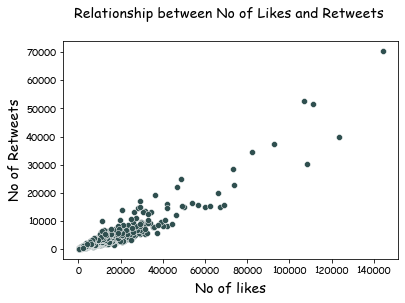

In [145]:
import seaborn as sns

# visualizing the relationship between favorite_count and retweet_count
ax = sns.scatterplot(data = cleaned_df, x = 'favorite_count', y = 'retweet_count', color = '#2F4F4F')
ax.set(ylabel = 'No of Retweets', xlabel = 'No of likes', title = 'Relationship between No of Likes and Retweet')
plt.xlabel('No of likes', fontsize=14)
plt.ylabel('No of Retweets', fontsize=14)
plt.title('Relationship between No of Likes and Retweets \n', fontsize=14)

_There is a strong positive relationship between the number of likes and the no of retweets for a tweet. That is, the higher the number of likes for a tweet, the higher the no of retweets, and vice versa_

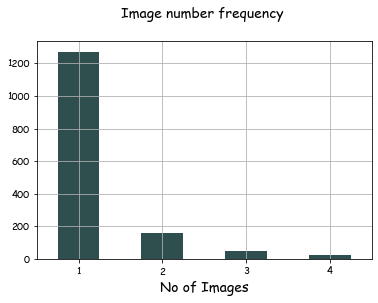

In [146]:
# Visualizing the frequency of the number of images

img_freq = cleaned_df['img_num'].value_counts()
img_freq.plot(kind = 'bar', color = '#2F4F4F')
plt.title('Image number frequency \n', fontsize=14)
plt.xlabel('No of Images', fontsize=14)
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

_The most common number of images posted in a tweet is 1._

(array([0, 1, 2]),
 [Text(0, 0, 'Twitter for iPhone'),
  Text(1, 0, 'Twitter Web Client'),
  Text(2, 0, 'TweetDeck')])

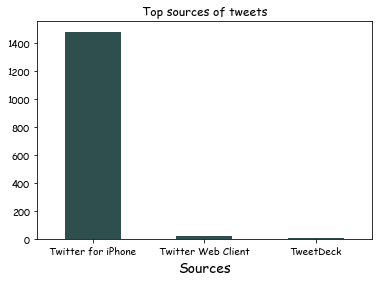

In [147]:
# top sources of tweets

sources = cleaned_df['source'].value_counts()
sources.plot(kind = 'bar', color = '#2F4F4F')
plt.title('Top sources of tweets')
plt.xlabel('Sources', fontsize = 14)
plt.xticks(rotation=0)

_The most common source of tweets is from iPhone devices which consists of over 90% of sources._

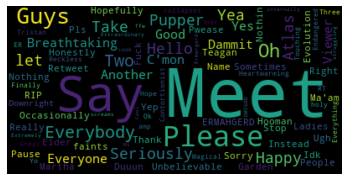

In [148]:
# visualizing the most prominent items in the text column of twitter_archive dataframe

text = " ".join(txt.split()[0] for txt in cleaned_df.text)
word_cloud = WordCloud(collocations = False, background_color = 'black').generate(text)
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

_The most common words used in texts are 'Meet', 'Say', 'Please', 'Oh', 'Guys', 'Everybody', 'let', among others._

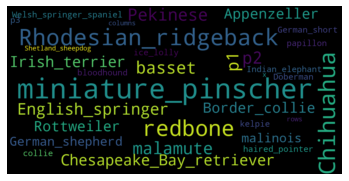

In [152]:
# Visualizing the top breed of dogs

text2 = str(cleaned_df[['p1', 'p2', 'p3']])
word_cloud2 = WordCloud(collocations=False, scale=3, background_color='black').generate(text2)
plt.imshow(word_cloud2, interpolation = 'bilinear')
plt.axis('off')
plt.show()

_The most common dog breeds are miniature_pinscher, Rhodesian_ridgeback, Chihuahua, redbone, among others._